<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Libraries required for Loading the data and for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries required for Modelling and scoring
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('data/dataset.csv')

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


First of All - This Dataset is taken from [Kaggle](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention) - Which is Again taken from [zenodo](https://zenodo.org/record/5777340#.Y9nTmnZBxEa)

This dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.

The dataset includes demographic data, socioeconomic and macroeconomic data, data at the time of student enrollment, and data at the end of the first and second semesters.

The data sources used consist of internal and external data from the institution and include data from (i) the Academic Management System (AMS) of the institution, (ii) the Support System for the Teaching Activity of the institution (developed internally and called PAE), (iii) the annual data from the General Directorate of Higher Education (DGES) regarding admission through the National Competition for Access to Higher Education (CNAES), and (iv) the Contemporary Portugal Database (PORDATA) regarding macroeconomic data.

#### 1.1 Data Dictionary

**1 - Demographic data:**

* Marital status: 1=Single, 2=Married, 3=Widower, 4=Divorced, 5=Facto Union, 6=Legally Seperated
* Nationality: 1=Portuguese, 2=German, 3=Spanish, 4=Italian, 5=Dutch, 6=English, 7=Lithuanian, 8=Angolan, 9=Cape Verdean, 10=Guinean, 11=Mozambican, 12=Santomean, 13=Turkish, 14=Brazilian, 15=Romanian, 16=Moldova, 17=Mexican, 18=Ukrainian, 19=Russian, 20=Cuban, 21=Colombian
* Displaced: 0=No, 1=Yes
* Gender: 0=Female, 1=Male
* Age at Enrollment: Age of the student at the time of Enorllment
* International: if the student is internation or from the same country - 0=No, 1=Yes

In [4]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


It's Looking Great !!!

All Data here is in Numerics (Int64 or Float64 Data type)

We need to convert Target column data as it is still in object data type for our Model.

But First, Lets proceed to our Objectives.

# 2. Objectives


Our main objective is to `predict students' dropout and academic success`

First, let's define some functions that will help us in the future analysis.

Below function will calculate the   $R^{2}$  on each feature given the input of the model.

In [7]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

Below function will plot the estimated coefficients for each feature and find $R^{2}$ on training and testing sets.

In [8]:
def plot_coef(X,model,name=None):
    

    plt.bar(X.columns[2:],abs(model.coef_[2:]))
    plt.xticks(rotation=90)
    plt.ylabel("$coefficients$")
    plt.title(name)
    plt.show()
    print("R^2 on training  data ",model.score(X_train, y_train))
    print("R^2 on testing data ",model.score(X_test,y_test))

Below function plots the distribution of two inputs.

In [9]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()
    plt.xticks([0,1], ['Dropout', 'Graduated'], rotation=0)
    plt.title('Actual vs Fitted Values')
    plt.xlabel('Academic Status')
    plt.ylabel('number of Students')

    plt.show()
    plt.close()

#### 2.1 Exploratory Data Analysis

Let's Check what we can learn from this data.

In [10]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

No Null Values !!! <br>
Good Start for our analysis.

Now, Let's Visualize the distribution of Target feature

In [11]:
# Counting the Value of Each Distribution of Target featurs
data.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

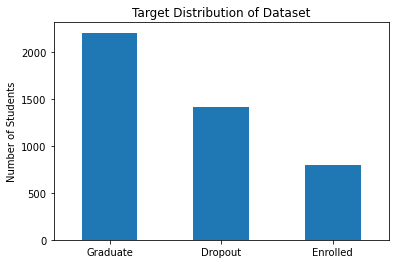

In [12]:
data["Target"].value_counts().plot(kind="bar", figsize=(6,4),title="Target Distribution of Dataset")
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

###### As we want to predict about academic success ENROLLED category is of no use to use, So Droppin the same

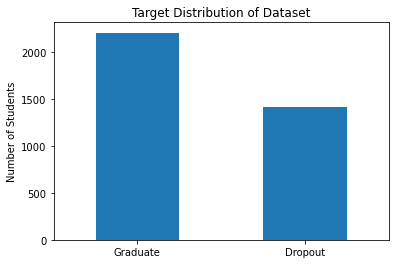

In [13]:
data = data[data.Target != "Enrolled"]
data["Target"].value_counts().plot(kind="bar", figsize=(6,4),title="Target Distribution of Dataset")
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

###### New Dataframe Info after dropping the Enrolled students from Target feature.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

As you can see, the entries/row have been decreased from 4424 to 3630.<br>
Now let's check the Value counts of Target Feature

In [15]:
# Counting the Value of Each Distribution of Target featurs
data.Target.value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [16]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,6.810193,1.750138,9.935537,0.887603,2.552617,1.242424,12.558678,16.663636,7.212948,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,5.253618,1.333831,4.340715,0.315897,3.952440,1.700394,9.006183,10.993025,3.707343,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,11.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,6.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


###### Is Marrital Status Affecting the Academic Progress of student?

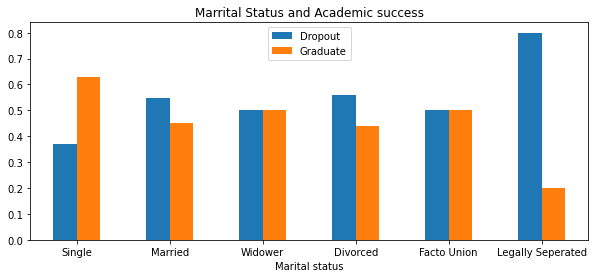

In [17]:
# Marrital Status affecting Academic Progress of student

pd.crosstab(data["Marital status"], data["Target"], normalize='index').plot(kind="bar", figsize=(10,4), title="Marrital Status and Academic success" )
plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'], rotation=0)
plt.legend(loc=9)
plt.show()

Few Findings:
* Here we can see that if Student's Marrital status is Legally seperated than there are high chances of dropping out from the course, as he/she may have lost their focus due to personal issues.
On the other hand Singles have more chance of being graduated as their focus in only on one thing
* Also we can see from the data that Married and Divorced students have more chances of dropping out from the course but the gap between dropping out from the course and being Graduated is very less

###### Is  Nationality Status affecting the Academic Progress of student?

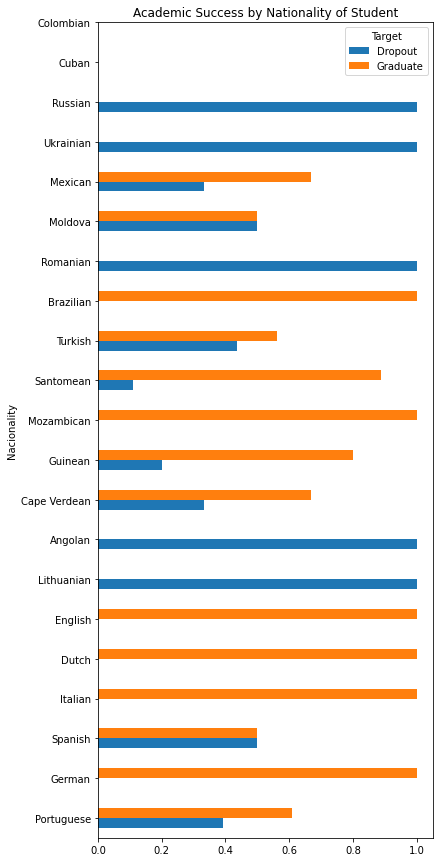

In [18]:
# Nationality Status affecting Academic Progress of student

pd.crosstab(data["Nacionality"], data["Target"], normalize='index').plot(kind="barh", figsize=(6,15), title="Academic Success by Nationality of Student")
plt.yticks(range(0,21), ['Portuguese', 'German', 'Spanish', 'Italian', 'Dutch', 'English', 'Lithuanian', 'Angolan', 'Cape Verdean', 'Guinean', 'Mozambican', 'Santomean', 'Turkish', 'Brazilian', 'Romanian', 'Moldova', 'Mexican', 'Ukrainian', 'Russian', 'Cuban', 'Colombian'])
plt.show()

<AxesSubplot:>

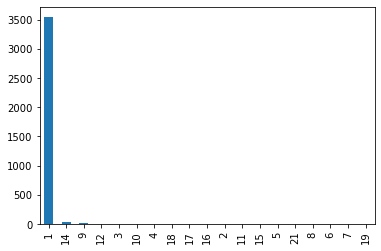

In [19]:
data["Nacionality"].value_counts().plot(kind="bar")

**This Feature is useless because most of them are from Portuguese. Which may lead to bias and bad modeling. Delete this feature of Nationality**

In [20]:
features_to_be_removed = ["Nacionality"]

###### Let's Check thee Gender of student and their Academic Progress ?

<Figure size 576x432 with 0 Axes>

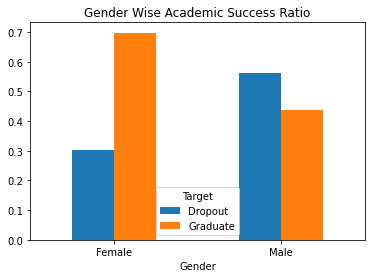

In [21]:
# lets check for Gender
plt.figure(figsize=(8,6))
pd.crosstab(data.Gender, data.Target, normalize='index').plot(kind="bar")
plt.xticks([0,1], ['Female', 'Male'], rotation=0)
plt.title("Gender Wise Academic Success Ratio")
plt.show()

###### Now, Let's conver our target feature into numeric for our model.

* Dropout - 0
* Graduate -1

In [22]:
data["Target"].unique()

array(['Dropout', 'Graduate'], dtype=object)

In [23]:
data["Target"].replace('Dropout', 0, inplace=True)
data["Target"].replace('Graduate', 1, inplace=True)

data.Target.dtype

dtype('int64')

In [24]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

Dividing our dataset into smaller datasets for correlation matrix and dropping the features which are not related to our target.

In [25]:
# As we are having more Features lets check first with Attributes Class

# Demographic Data
demo_df = data[["Marital status", "Nacionality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# Socio Economic Data
sc_df = data[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# Macro and Academic Enrollment Data
mae_df = data[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# Academic Data
ac_df = data[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

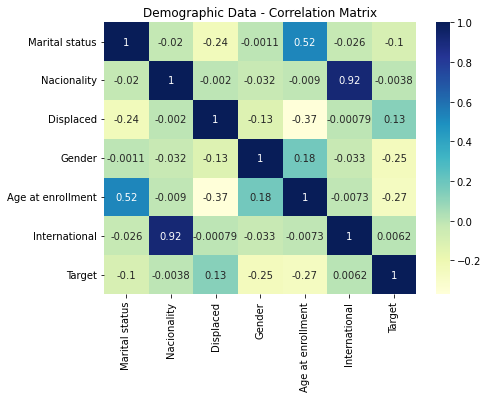

In [26]:
# Correlation Matrix for Demographic Data

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(demo_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Demographic Data - Correlation Matrix")
plt.show()

Few findings:
* Here, International and Nationality is having 0.92 Correlation, But anyway we are removing Nationality feature
* All other features seems to be normally related with our Target

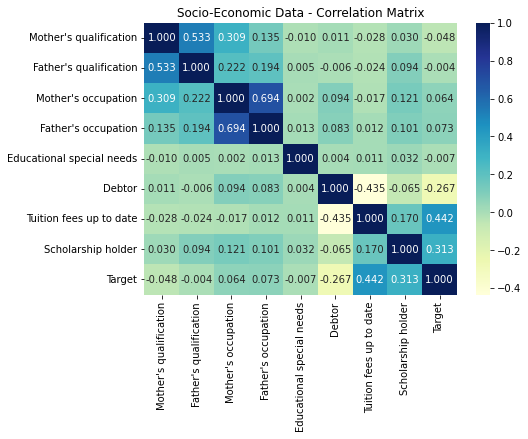

In [27]:
# Correlation Matrix for Socio-Economic Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(sc_df.corr(), annot=True, cmap="YlGnBu", fmt='.3f')
plt.title("Socio-Economic Data - Correlation Matrix")
plt.show()

Few Findings:
* Parent's Occupation is correlated with each other with correlation value of 0.69, But as of now we are keeping both.

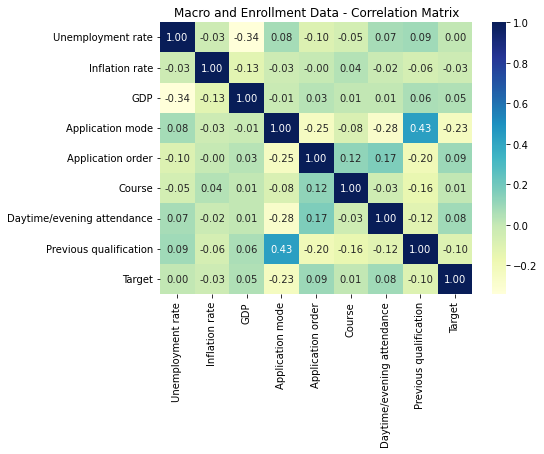

In [28]:
# Correlation Matrix for Macro and Academic enrollment Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(mae_df.corr(), annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Macro and Enrollment Data - Correlation Matrix")
plt.show()

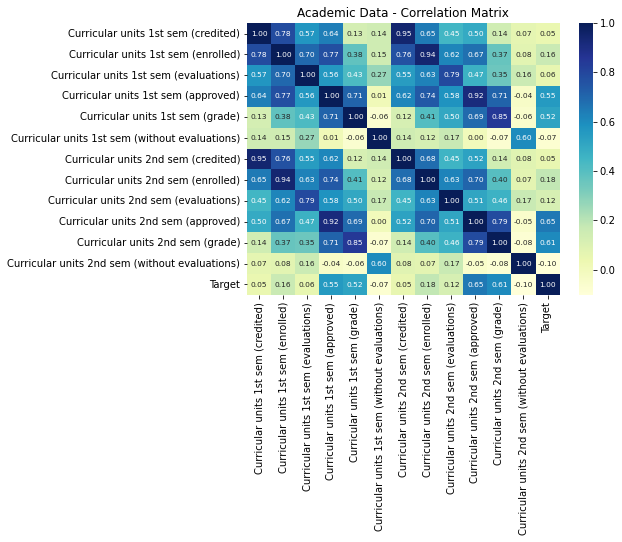

In [29]:
# Correlation Matrix for Academic Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(ac_df.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 7.5})
plt.title("Academic Data - Correlation Matrix")
plt.show()

Features that can be removed -
* Curricular units 1st sem (credited) (0.95 correlation with sem 2)
* Curricular units 1st sem (enrolled) (0.94 correlation with sem 2)
* Curricular units 1st sem (evaluation) (0.79 correlation with sem 2)
* Curricular units 1st sem (approved) (0.92 correlation with sem 2)
* Curricular units 1st sem (grade) (0.85 correlation with sem 2) (Removing Sem 1 data as sem 2 data is more correlated with our Target Label)

In [30]:
features_to_be_removed.extend(["Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)"])
features_to_be_removed

['Nacionality',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)']

In [31]:
data.drop(features_to_be_removed, axis=1, inplace=True)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,3,4,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,22,27,10,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,23,27,6,4,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,22,28,10,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


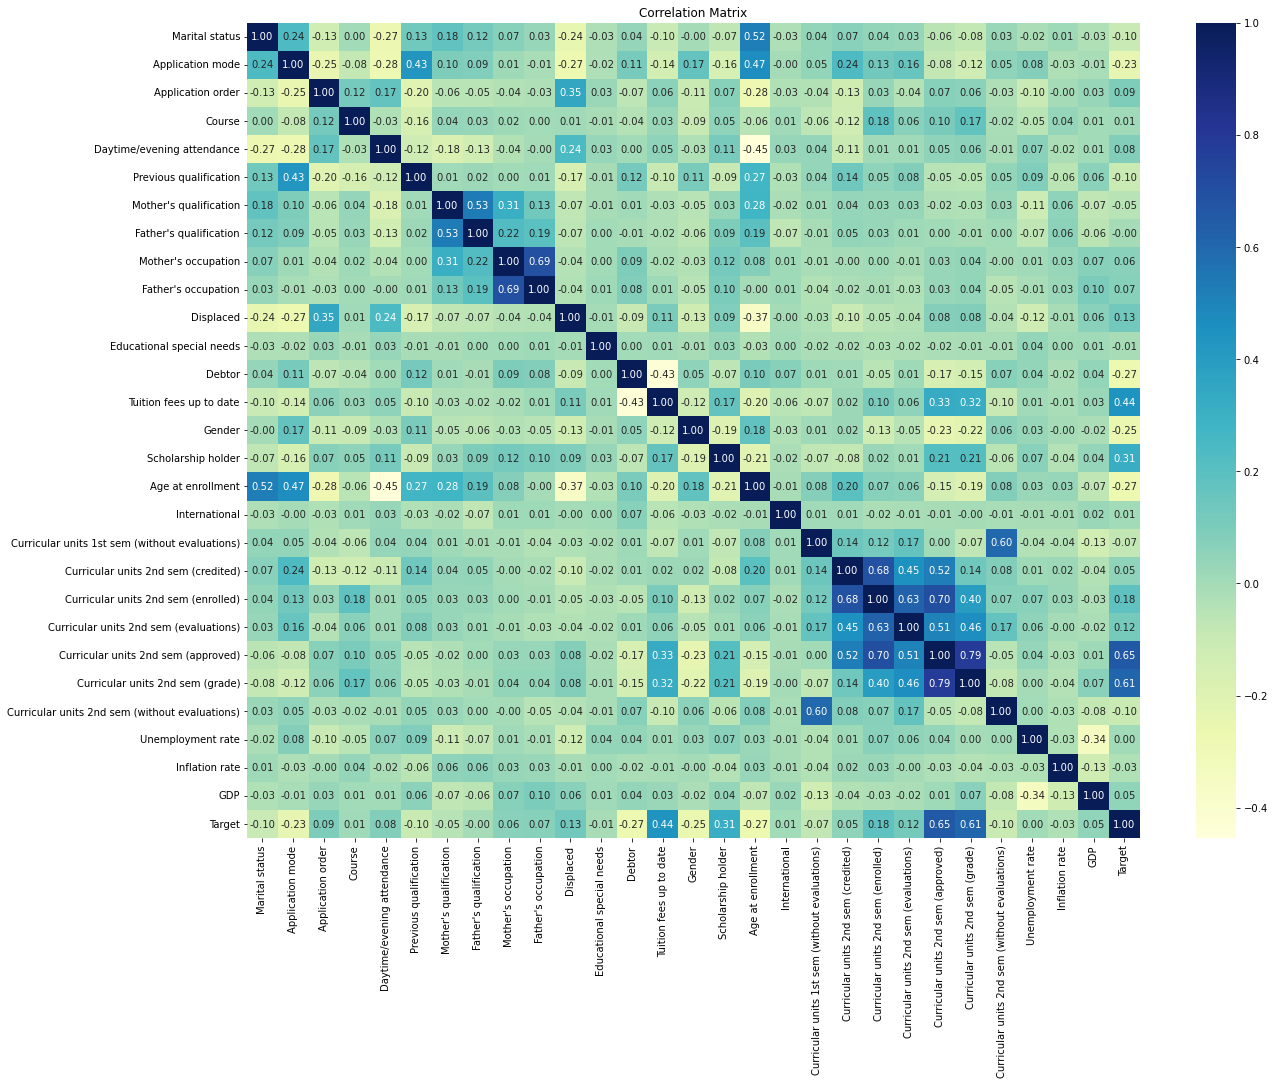

In [32]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()

# 3. Linear Regression Models


###### 3.1 Data Preparation
Let's first split our data into X features and y target.

In [33]:
X = data.drop('Target', axis=1)
y = data.Target

Now, we split our data, using train_test_split function, into the training and testing sets, allocating 30% of the data for testing.

In [34]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 1089
number of training samples: 2541


Let's create a Linear Regression object, called lr.

In [35]:
lr = LinearRegression()

Now, let's fit the model with multiple features on our X_train and y_train data.

In [36]:
lr.fit(X_train,y_train)

LinearRegression()

Let's predict the testing data set with predict() function.

In [37]:
predicted = lr.predict(X_test)

Now, let's calculate the $R^2$ on both, training and testing data sets.

In [38]:
print("R^2 on training  data ",lr.score(X_train, y_train))
print("R^2 on testing data ",lr.score(X_test,y_test))

R^2 on training  data  0.6514426304770102
R^2 on testing data  0.6518481705753826


Let's plot a distribution of the predicted values vs the actual values with the function that we created in Objectives section.

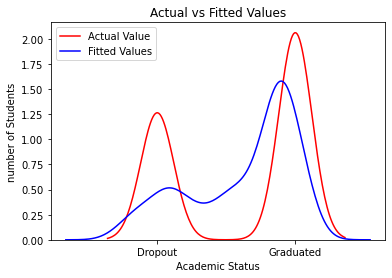

In [39]:
plot_dis(y_test,predicted)

We can view the estimated coefficients for the simple linear regression model and it's not a good fit for the problem.

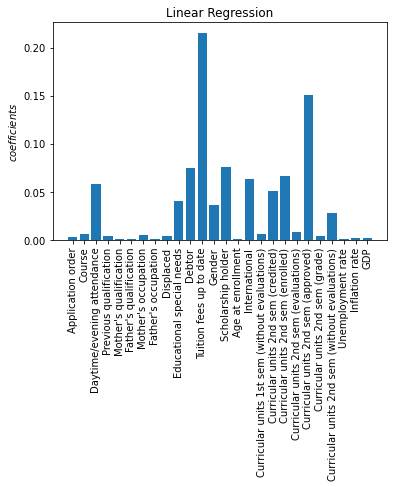

R^2 on training  data  0.6514426304770102
R^2 on testing data  0.6518481705753826


In [40]:
plot_coef(X,lr,name="Linear Regression")

**Ridge Regression**

Ridge Regression makes the prior assumption that our coefficients are normally distributed around zero. A regularization term, alpha, is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. The variance of the distribution is inversely proportional to the parameter alpha. 

We minimize the MSE, but we also penalize large weights by including their magnitude $||w||\_2$ in the minimization term. This additional minimization term makes the model less susceptible to noise and makes the weights smaller. Alpha controls the takeoff between MSE and penalization or regularization term and is chosen via cross-validation.

In [41]:
rr = Ridge(alpha=0.1)
rr

Ridge(alpha=0.1)

Like simple Linear regression, you can fit the model using the fit() method.
Similarly, you can obtain a prediction:

In [42]:
rr.fit(X_train,y_train)
rr.predict(X_test)

array([ 0.67120988,  0.44138304, -0.07205106, ...,  0.83663705,
        0.16323002,  0.85522493])

We can calculate the $R^2$ on the training and testing data.

In [43]:
print("R^2 on training  data ",rr.score(X_train, y_train))
print("R^2 on testing data ",rr.score(X_test,y_test))

R^2 on training  data  0.6514426247837082
R^2 on testing data  0.6518534060254456


Now let's compare the Ridge Regression and the Linear Regression  models. The results on the $R^2$ are about the same, and the coefficients seem to be smaller.

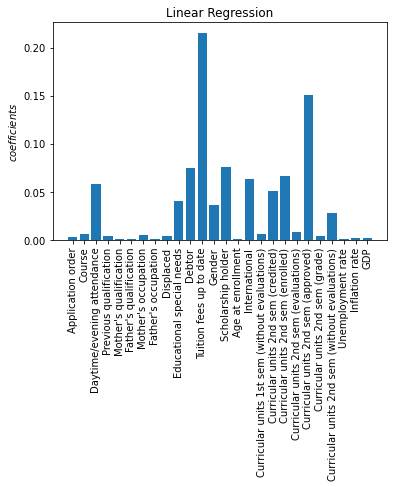

R^2 on training  data  0.6514426304770102
R^2 on testing data  0.6518481705753826


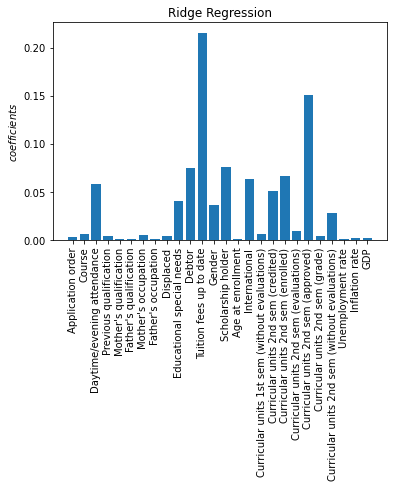

R^2 on training  data  0.6514426247837082
R^2 on testing data  0.6518534060254456


In [44]:
plot_coef(X,lr,name="Linear Regression")
plot_coef(X,rr,name="Ridge Regression")

Both Model performing in similar way. Let's see if we increase the alpha, will the coefficients get smaller, but the results are as bad as our previous value of alpha.

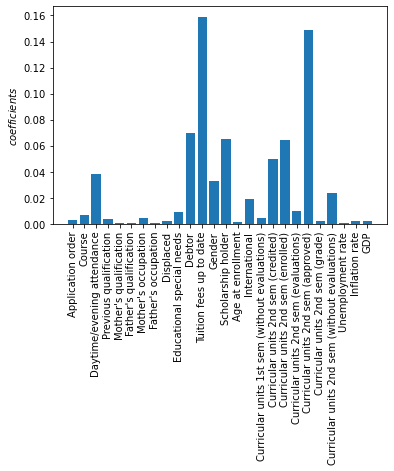

R^2 on training  data  0.6493745016997778
R^2 on testing data  0.6538536840294469


In [45]:
rr = Ridge(alpha=100)
rr.fit(X_train, y_train)
plot_coef(X,rr)

In general, we see that if we increase alpha, the coefficients get smaller, but the model performance relationship gets more complex. As a result, we use the validation data to select a value for alpha. Here, we plot the coefficients and $R^2$ of the test data on the vertical axes and alpha on the horizontal axis, as well the $R^2$ using the test data.

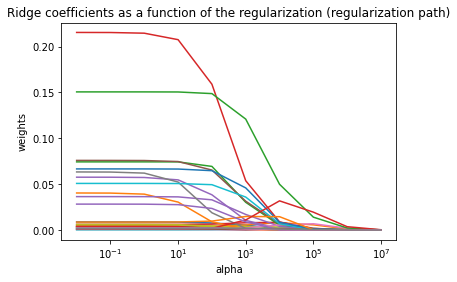

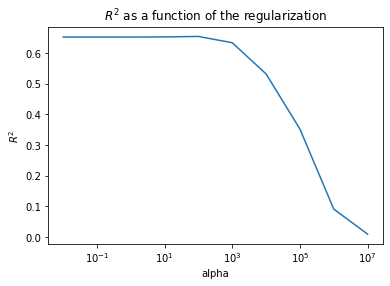

In [46]:
alphas = [0.01,0.1,1,10,100,1000,10000,100000,1000000,10000000]
R_2=[]
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(abs(ridge.coef_))
    R_2.append(ridge.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()          

As we increase alpha, the coefficients get smaller but the $R^2$ peaks when alpha is $10^2$.

Let's plot the MSE as a function of alpha.

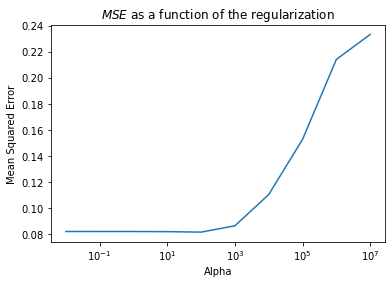

In [47]:
alphas = [0.01,0.1,1,10,100,1000,10000,100000,1000000,10000000]
mean_sqe = []
for alpha in alphas:
    ridge= Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    Rpred = ridge.predict(X_test)
    mean_sqe.append(mean_squared_error(Rpred,y_test))
    

ax = plt.gca()
ax.plot(alphas, mean_sqe)
ax.set_xscale("log")
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title("$MSE$ as a function of the regularization")
plt.show()

**Pipeline:**
We can also create a Pipeline object and apply a set of transforms sequentially. Then, we can apply Polynomial Features, perform data standardization then apply Ridge regression.  Data Pipelines simplify the steps of processing the data. We use the module `Pipeline` to create a pipeline. We also use `StandardScaler` step in our pipeline. Scaling our data is necessary step in Ridge regression as it will penalize features with a large magnitude.

Now, we create a pipeline object.


In [48]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Ridge(alpha=100))]
pipe = Pipeline(Input)

In [49]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=100))])

Let's calculate the score on data:

In [50]:
predicted=pipe.predict(X_test)
pipe.score(X_test, y_test)

0.6562004799637886

Well it seems that the score is getting worse and looking for `hyperparameters` can get difficult with loops. The problem will get worse as we add more transforms such as polynomial transform. Therefore, we will use `GridSearchCV` to make things simpler.

**GridSearchCV**
To search for the best combination of hyperparameters we can create a GridSearchCV() function as a dictionary of parameter values. The parameters of pipelines can be set by using the name of the key, separated by "__", then the parameter. Here, we look for different polynomial degrees and different values of alpha.

In [51]:
param_grid = {
    "polynomial__degree": [1,2,3],
    "model__alpha":[0.1,1,10,100,1000]
}

<b>polynomial\_\_degree</b>: is the degree of the polynomial; in this case 1,2, and 3.

<b>model\_\_alpha </b>: Regularization strength; must be a positive float.


Let's create a `GridSearchCV` object and fit it. The method trains the model and the hyperparameters are selected via exhaustive search over the specified values.

In [52]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
search

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=100))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.1, 1, 10, 100, 1000],
                         'polynomial__degree': [1, 2, 3]})

Useful attributes:
* `best_score_`: mean cross-validated score of the `best_estimator`.
* `best_params_dict`: parameter setting that gives the best results on the hold-out data.

Now, let's find the best score and best params:

In [53]:
rr_score = search.best_score_
print("Best Score: ",rr_score)
print("Best Params: ",search.best_params_)

Best Score:  0.6428838479314836
Best Params:  {'model__alpha': 1, 'polynomial__degree': 1}


Let's predict the value with our test dataset  on the estimator with the best found parameters. We can use predict() function for this and also we will show the best estimator.

In [54]:
predict = search.predict(X_test)
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=1))])

As we can see from the above output, it is `1` degree polynomial with alpha value of `1`. Now, let's make a prediction and we can calculate the $R^2$ on the test data.

In [55]:
predict = best.predict(X_test)
rr_score = best.score(X_test, y_test)

In [56]:
print("Ridge Regression best R^2 score: ",rr_score)

Ridge Regression best R^2 score:  0.6518072517133868


As we see, using Ridge Regression polynomial function works better than all other models. Finely, we can train our model on the entire data set!

In [57]:
best.fit(X,y)

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=1))])

**Lasso Regression:**
In this section, let's review the Lasso (Least Absolute Shrinkage and Selection Operator) Regression. Lasso Regression makes the prior assumption that our coefficients have Laplace (double-exponential) distribution around zero. The scale parameter of the distribution is inversely proportional to the parameter alpha. The main advantage of LASSO Regression is that many coefficients are set to zero, therefore they are not required. This has many advantages, one of them is that you may not need to collect and/or store all of the features. This may save resources. For example, if the feature was some medical test, you would no longer need to perform that test. Let's see how the parameter alpha changes the model.

We minimize the MSE, but we also penalize large weights by including their sum of absolute values.


This regularization or penalty term makes many coefficients zero, making the model easy to understand and can also be used for feature selection. There are some drawbacks to this technique. It takes longer time to train and the solution may not be unique. Alpha controls the trade-off between MSE and penalization or regularization term and is chosen via cross-validation.  Let's see how the parameter alpha changes the model. Note, as before, our test data will be used as validation data. Let's create a Ridge Regression object, setting the regularization parameter (alpha) to 0.0001.

In [58]:
la = Lasso(alpha=0.0001)
la.fit(X_train,y_train)
la

Lasso(alpha=0.0001)

Now let's make prediction and calculate the $R^2$ on the training and testing data and see how it performs compared to the other methods.

In [59]:
predicted = la.predict(X_test)
print("R^2 on training  data ",la.score(X_train, y_train))
print("R^2 on testing data ",la.score(X_test,y_test))

R^2 on training  data  0.6514345232104165
R^2 on testing data  0.6518747705838691


If we compare the Lasso Regression to the  Ridge Regression model we see that the results on the $R^2$ are slightly worse, but most of the coefficients are zero.

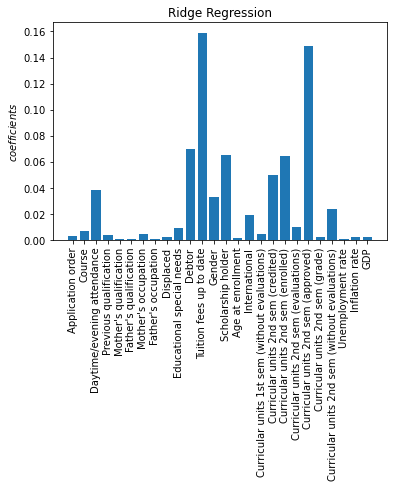

R^2 on training  data  0.6493745016997778
R^2 on testing data  0.6538536840294469


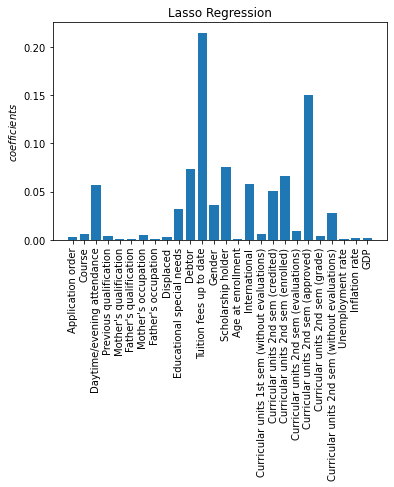

R^2 on training  data  0.6514345232104165
R^2 on testing data  0.6518747705838691


In [60]:
plot_coef(X,rr,name="Ridge Regression")
plot_coef(X,la,name="Lasso Regression")

Similar to the Ridge Regression, if we increase the value of alpha, the coefficients will get smaller. Additionally, many coefficients become zero. Moreover, the model performance relationship becomes more complex. As a result, we use the validation data to select a value for alpha. Here, we plot the coefficients and $R^2$ of the test data on the vertical axes and alpha values on the horizontal axis.

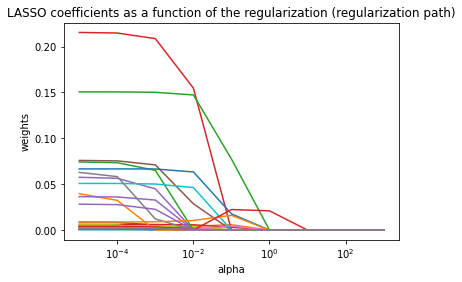

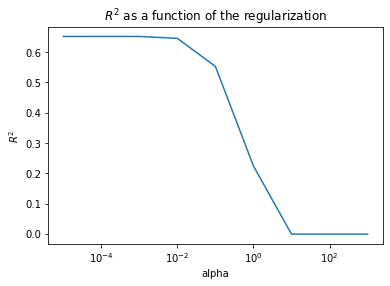

In [61]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
R_2=[]
coefs = []
for alpha in alphas:
    la=Lasso(alpha=alpha)
    
    la.fit(X_train, y_train)
    coefs.append(abs(la.coef_))
    R_2.append(la.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("LASSO coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()

We also use `StandardScaler` as a step in our pipeline. Scaling your data is necessary step in LASSO Regression, as it will penalize features with a large magnitudes.

Lets start by creating a pipeline object.


In [62]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Lasso(alpha=0.01, tol = 0.4))]
pipe = Pipeline(Input)

Let's fit the object, make our predictions, and calculate the $R^2$ on the training and testing data sets.

In [63]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([0.65937225, 0.30077817, 0.06857285, ..., 0.69356599, 0.18091588,
       0.8073544 ])

In [64]:
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

R^2 on training  data  0.6467963971941626
R^2 on testing data  0.6354562155422061


As we see, some individual features perform similarly to using all the features . Additionally, we see the smaller coefficients seem to correspond to a larger $R^{2}$, therefore  larger coefficients correspond to overfiting.

Now, Let's do Grid Search on Lasso Regression to find the best score and best estimator  

In [65]:
param_grid = {
    "polynomial__degree": [ 1, 2,3],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [66]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Lasso(alpha=0.01, tol=0.4))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3]})

Best Estimator:

In [67]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ss', StandardScaler()),
                ('model', Lasso(alpha=0.01, tol=0.4))])

Best $R^2$ score:

In [68]:
la_score = best.score(X_test,y_test)
la_score

0.6472061231891624

**Elastic Net:** In this section, let's review the Elastic Net Regression. It combines L1 and L2 priors as regularizes or penalties.

In [69]:
#Initialisation of ElasticNet object
enet = ElasticNet(alpha=0.01, l1_ratio=0.5)
#fitting the training data
enet.fit(X_train,y_train)

ElasticNet(alpha=0.01)

Prediction and $R^2$ Score:

In [70]:
predicted=enet.predict(X_test)

In [71]:
print("R^2 on training  data ", enet.score(X_train, y_train))
print("R^2 on testing data ", enet.score(X_test,y_test))

R^2 on training  data  0.6463882866501611
R^2 on testing data  0.6517589414455802


Let's compare the Elastic Net to Simple Regression, Lasso Regression, and Ridge Regression, we see the results on the  $R^2$ are better than the Elastic Net and many of the coefficients are zero.

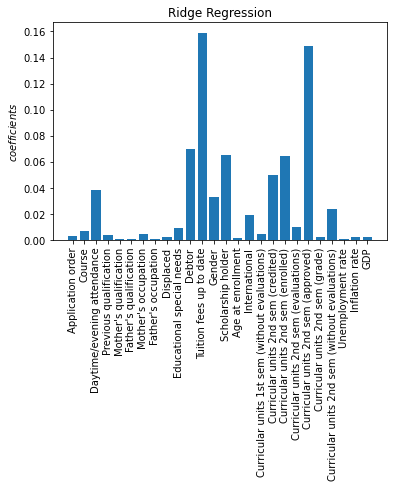

R^2 on training  data  0.6493745016997778
R^2 on testing data  0.6538536840294469


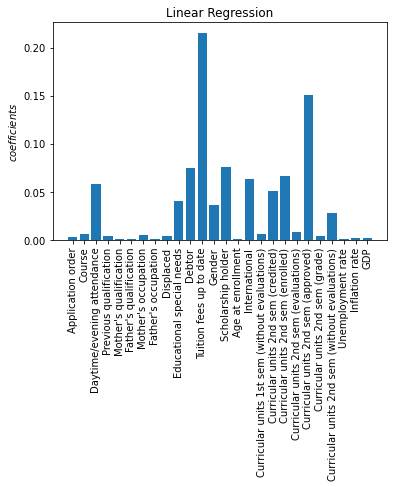

R^2 on training  data  0.6514426304770102
R^2 on testing data  0.6518481705753826


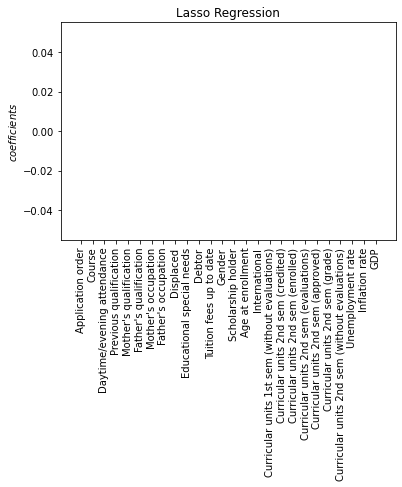

R^2 on training  data  0.0
R^2 on testing data  -0.001104867067600157


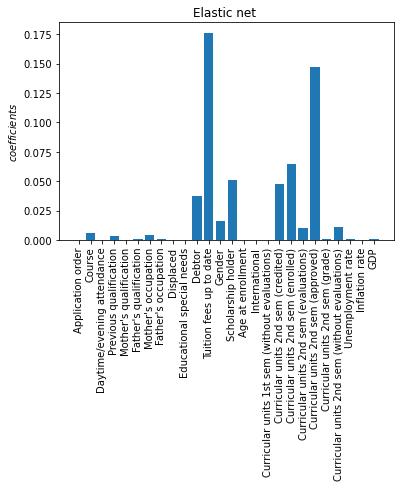

R^2 on training  data  0.6463882866501611
R^2 on testing data  0.6517589414455802


In [72]:
plot_coef(X,rr,name="Ridge Regression")
plot_coef(X,lr,name="Linear Regression")
plot_coef(X,la,name="Lasso Regression")
plot_coef(X,enet,name="Elastic net ")

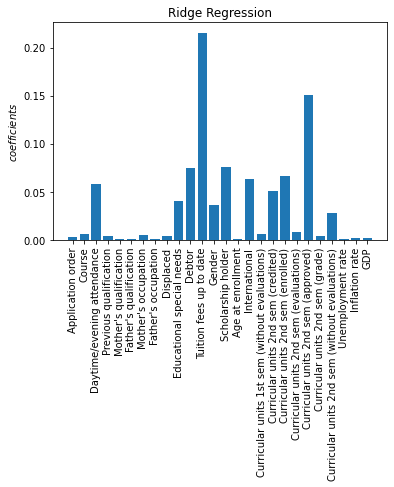

R^2 on training  data  0.6514426304199522
R^2 on testing data  0.6518486946066475


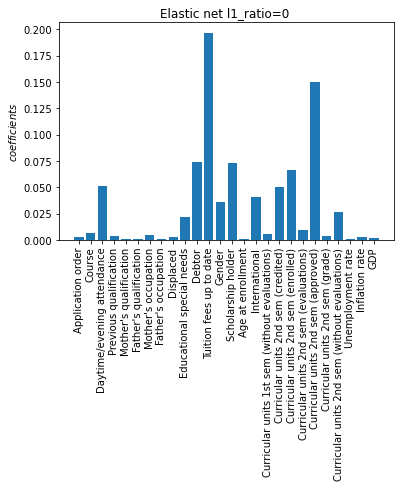

R^2 on training  data  0.6512025069200778
R^2 on testing data  0.6528900987175946


In [73]:
enet = ElasticNet(alpha=0.01, l1_ratio=0)
enet.fit(X_train,y_train)
rr = Ridge(alpha=0.01)
rr.fit(X_train,y_train)
plot_coef(X,rr,name="Ridge Regression")

plot_coef(X,enet,name="Elastic net l1_ratio=0 ")

In [74]:
# Enter your code and run the cell
Input = [ ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), ('ss', StandardScaler()), ('model', ElasticNet(alpha=0.1, l1_ratio=0.1))]
pipe = Pipeline(Input)
pipe.fit(X_train,y_train)
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

R^2 on training  data  0.6566899619967864
R^2 on testing data  0.6505860766418902


In [75]:
param_grid = {
    "polynomial__degree": [ 1, 2,3],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10],
    "model__l1_ratio":[0,0.1,0.25,0.5]
}


In [76]:
# Enter your code and run the cell
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',ElasticNet(tol = 0.2))]
pipe = Pipeline(Input)
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_test, y_test)
best=search.best_estimator_
best.score(X_test,y_test) 

0.7086685631206114

In [77]:
enet_score = best.score(X_test,y_test)
enet_score

0.7086685631206114

Now, Let's print all of best $R^2$ scores of each regression model respectively.

In [78]:
#Printing all Regression Model's best score
print("Linear Regression best R^2 score: ",lr.score(X_test,y_test))
print("Ridge Regression best R^2 score: ",rr_score)
print("Lasso Regression best R^2 score: ",la_score)
print("Elastic Net best R^2 score: ", enet_score)

Linear Regression best R^2 score:  0.6518481705753826
Ridge Regression best R^2 score:  0.6518072517133868
Lasso Regression best R^2 score:  0.6472061231891624
Elastic Net best R^2 score:  0.7086685631206114


**With this result we can say that Elastic Net performs better compared to other regression models.**

# 4. Insights and key findings


* Here we can see that if Student's Marrital status is Legally seperated than there are high chances of dropping out from the course, as he/she may have lost their focus due to personal issues. On the other hand Singles have more chance of being graduated as their focus in only on one thing
* Also we can see from the data that Married and Divorced students have more chances of dropping out from the course but the gap between dropping out from the course and being Graduated is very less.
* The nationality of this dataset is purely biased as 95% of data belongs to Portuguese. So, we removed nationality from the feature set but it would have been great helped if this feature was not biased.
* Then, We found that the Males are more likely to dropout compared to Females.
* We check different correlation of each features respectively. Some of them were highly correlated to each other individually  but we needed a better Machine learning framework to create the best model. 
* Finally after testing different variations of linear regression models and with above results we can say that, Elastic Net is a model that best suits for prediction of students' dropout and academic success with a $R^2$ score of 0.709.

# 5. Next Steps


* This dataset is complex for working with variations of linear regression models.
* Prediction will work better if we use classification models.
* If we use different variation of classification models we need to go thorough a detailed Exploratory Data Analysis and detailed data processing. 

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
